# Day1. 전처리

## 통계청 출생아수(시도/시/군/구) 재현

* 관련기사 : ["우리 결혼 안 합니다" 생애 모델을 거부하는 사람들 [2023 연애·결혼 리포트]](https://www.sisain.co.kr/news/articleView.html?idxno=49841)

* 통계청에서 "데이터"를 [다운로드](http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&vw_cd=MT_GTITLE01&list_id=101&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01)

In [1]:
import pandas as pd

In [2]:
df_kosis = pd.read_csv("data/kosis-20240117021412.csv")
df_kosis.shape

(19, 937)

In [3]:
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">
이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [4]:
df_kosis.head(1)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)


In [5]:
df = df_kosis.melt(id_vars="시군구별")
df.head()

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345


In [6]:
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [7]:
df = df[df["시군구별"] != "시군구별"].copy()
df.shape

(16848, 3)

In [8]:
df["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [9]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [10]:
df["연도"] = df["variable"].str.split(".", expand=True)[0]
df["월"] = df["variable"].str.split(".", expand=True)[1]
df["성별"] = df["variable"].str.split(".", expand=True)[2]
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None


In [11]:
df.tail()

,시군구별,variable,value,연도,월,성별
17779,전라북도,2022.12.2,229,2022,12,2
17780,전라남도,2022.12.2,250,2022,12,2
17781,경상북도,2022.12.2,366,2022,12,2
17782,경상남도,2022.12.2,503,2022,12,2
17783,제주특별자치도,2022.12.2,121,2022,12,2


In [12]:
df["성별"].unique()

array([None, '1', '2'], dtype=object)

In [13]:
df["성별"].nunique()

2

In [14]:
df["성별"] = df["성별"].fillna("전체")
df["성별"].unique()

array(['전체', '1', '2'], dtype=object)

In [15]:
df["성별"] = df["성별"].replace("1", "남자").replace("2", "여자")
df["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [16]:
df["성별"].value_counts()

성별
전체    5616
남자    5616
여자    5616
Name: count, dtype: int64

In [17]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [18]:
df = df.rename(columns={"variable": "기간", "value": "출생아수"})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16848 non-null  object
 1   기간      16848 non-null  object
 2   출생아수    16848 non-null  object
 3   연도      16848 non-null  object
 4   월       16848 non-null  object
 5   성별      16848 non-null  object
dtypes: object(6)
memory usage: 921.4+ KB


In [20]:
import numpy as np
df["출생아수"] = df["출생아수"].replace("-", np.nan)
df["출생아수"] = df["출생아수"].astype(float)
df["출생아수"].describe()

count    16308.000000
mean      2898.333579
std       6406.925280
min         30.000000
25%        589.000000
50%        980.000000
75%       1833.250000
max      63268.000000
Name: 출생아수, dtype: float64

In [21]:
df_all = df[(df["시군구별"] == "전국") & (df["성별"] == "전체")]
df_all.head(2)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체


In [22]:
df_all = df_all[["연도", "월", "출생아수"]].copy()
df_all.head()

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0


In [23]:
# !pip install koreanize_matplotlib

In [24]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='연도,월'>

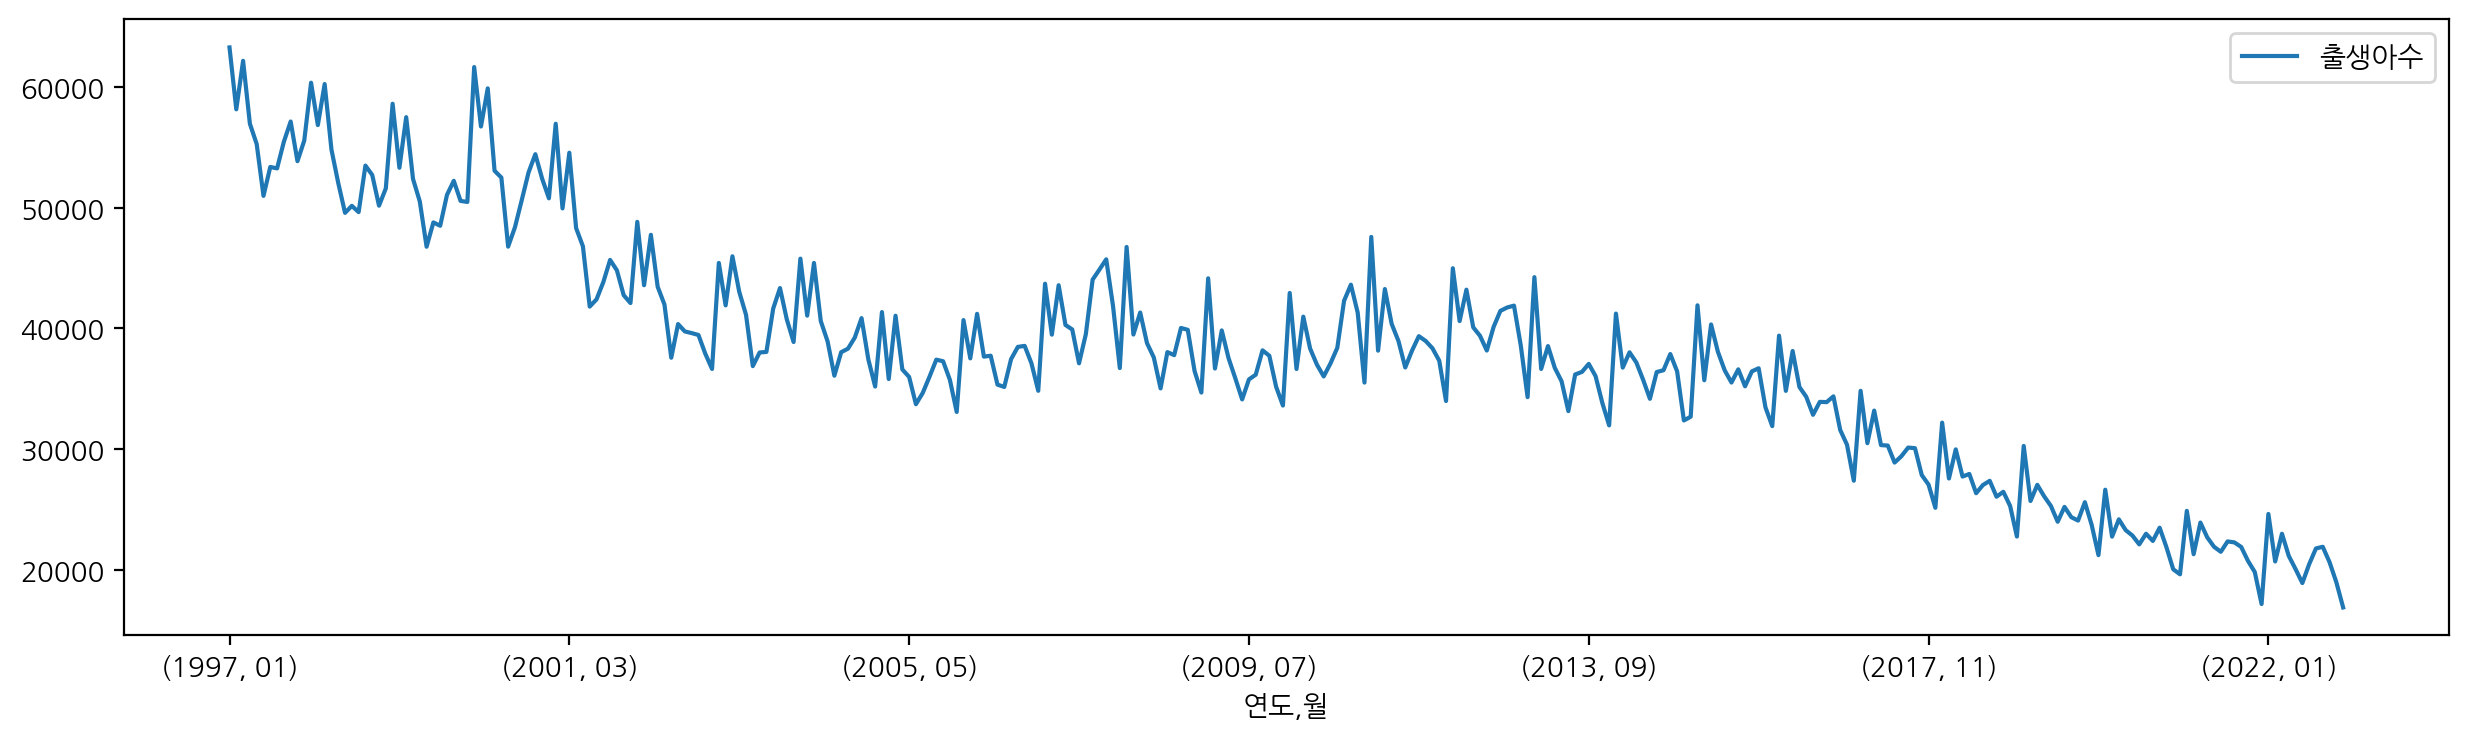

In [25]:
df_all.set_index(["연도", "월"]).plot(figsize=(15, 4))

<Axes: xlabel='연도,월'>

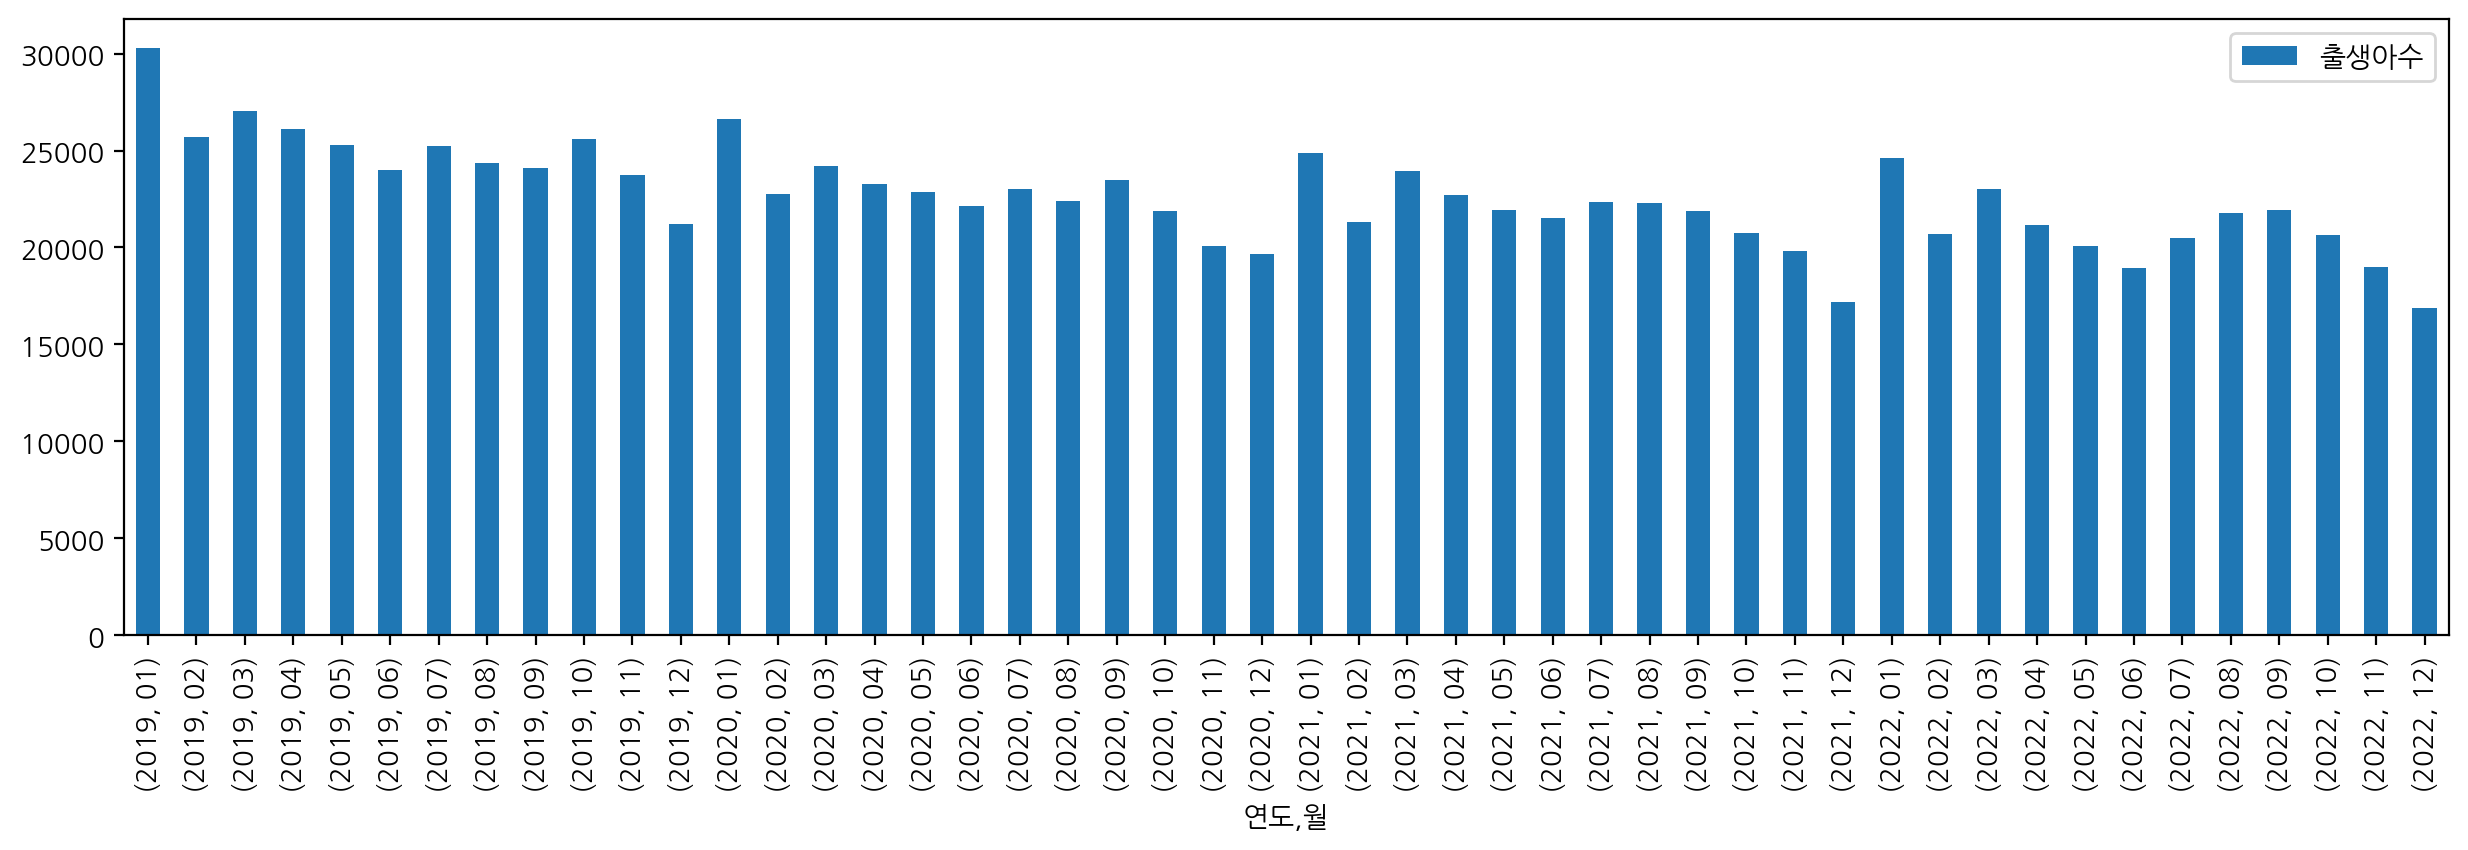

In [26]:
df_all[-48:].set_index(["연도", "월"]).plot.bar(figsize=(15, 4))

In [27]:
import seaborn as sns

<Axes: xlabel='연도', ylabel='출생아수'>

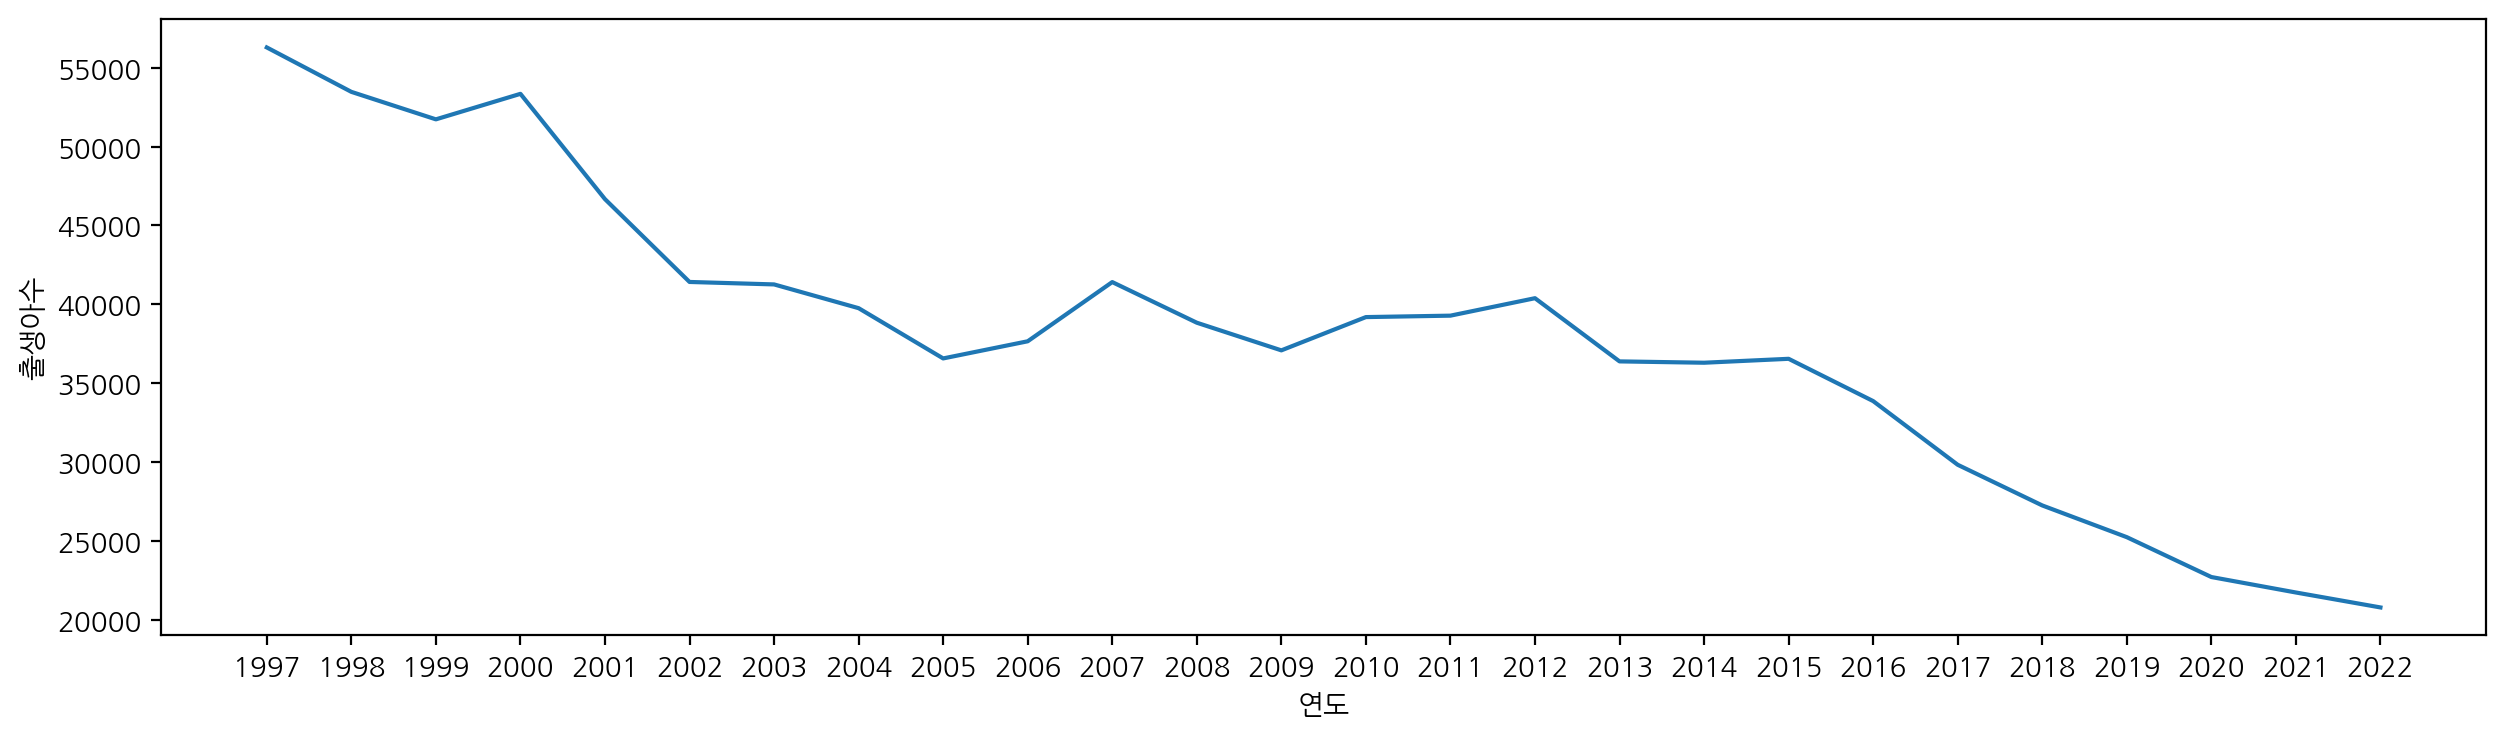

In [28]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x="연도", y="출생아수", errorbar=None)

<Axes: xlabel='연도', ylabel='출생아수'>

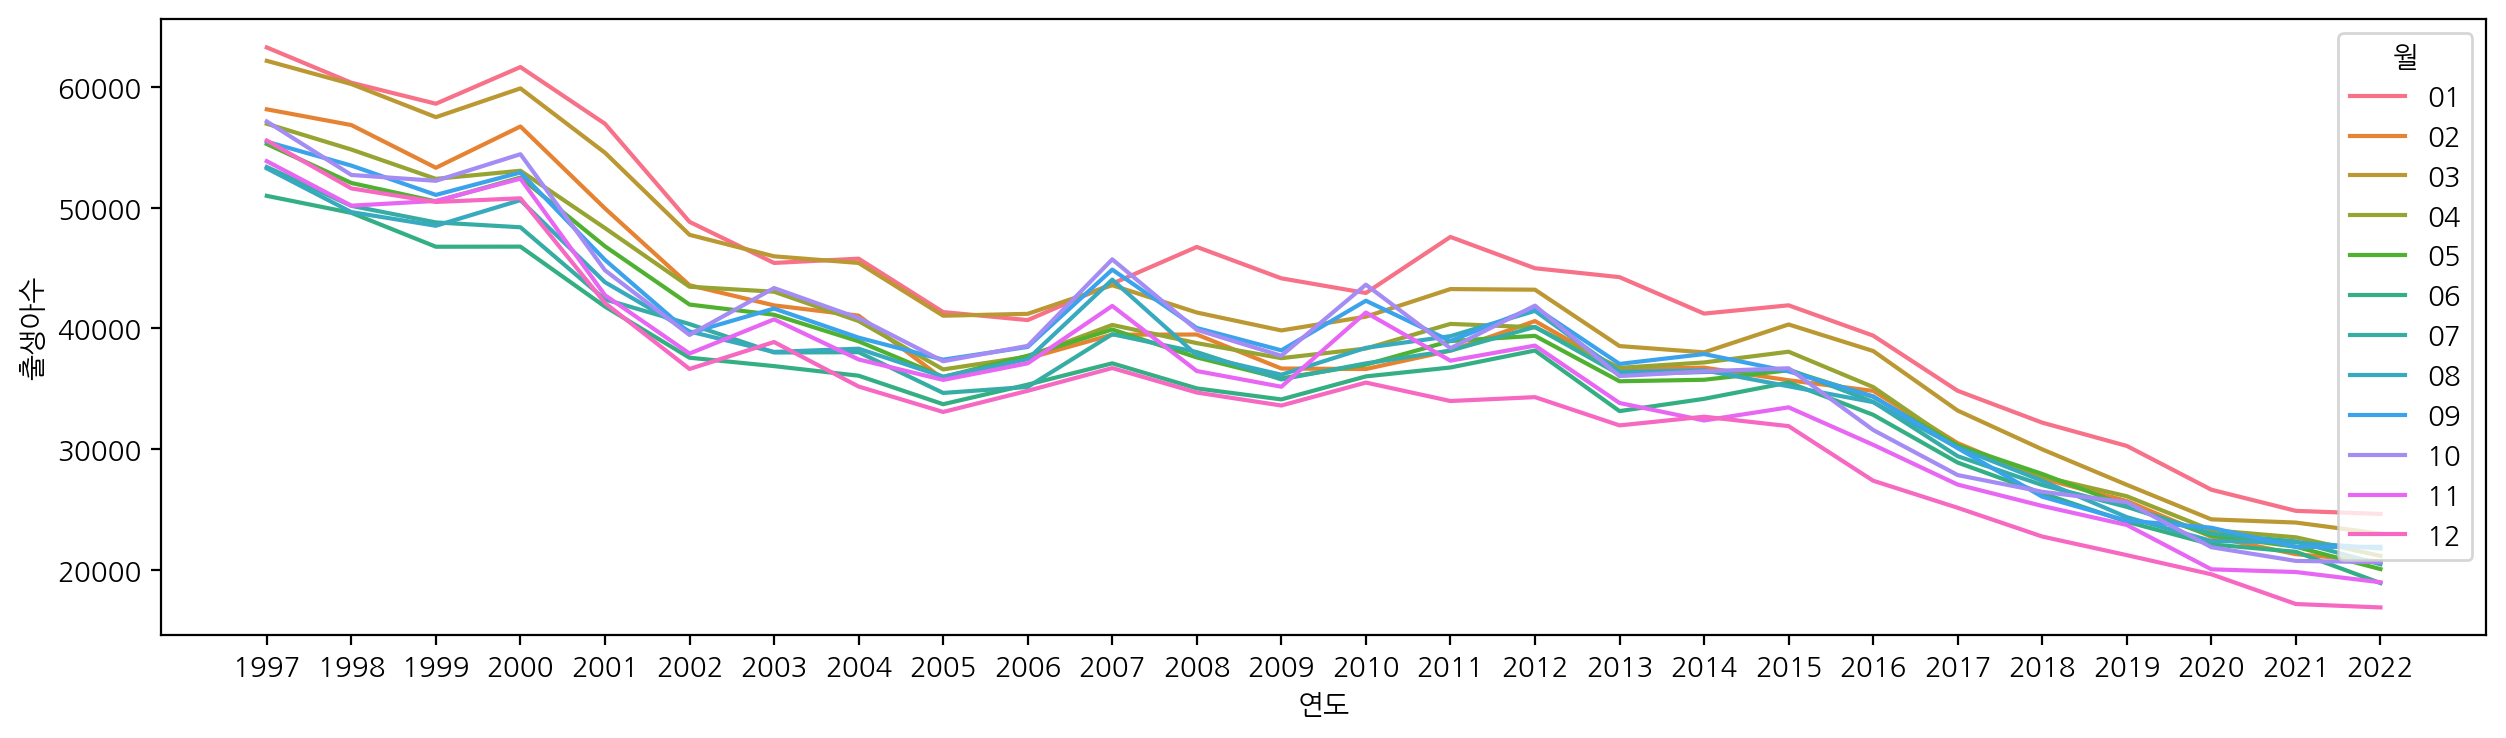

In [29]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x="연도", y="출생아수", errorbar=None, hue="월")

<Axes: xlabel='연도', ylabel='출생아수'>

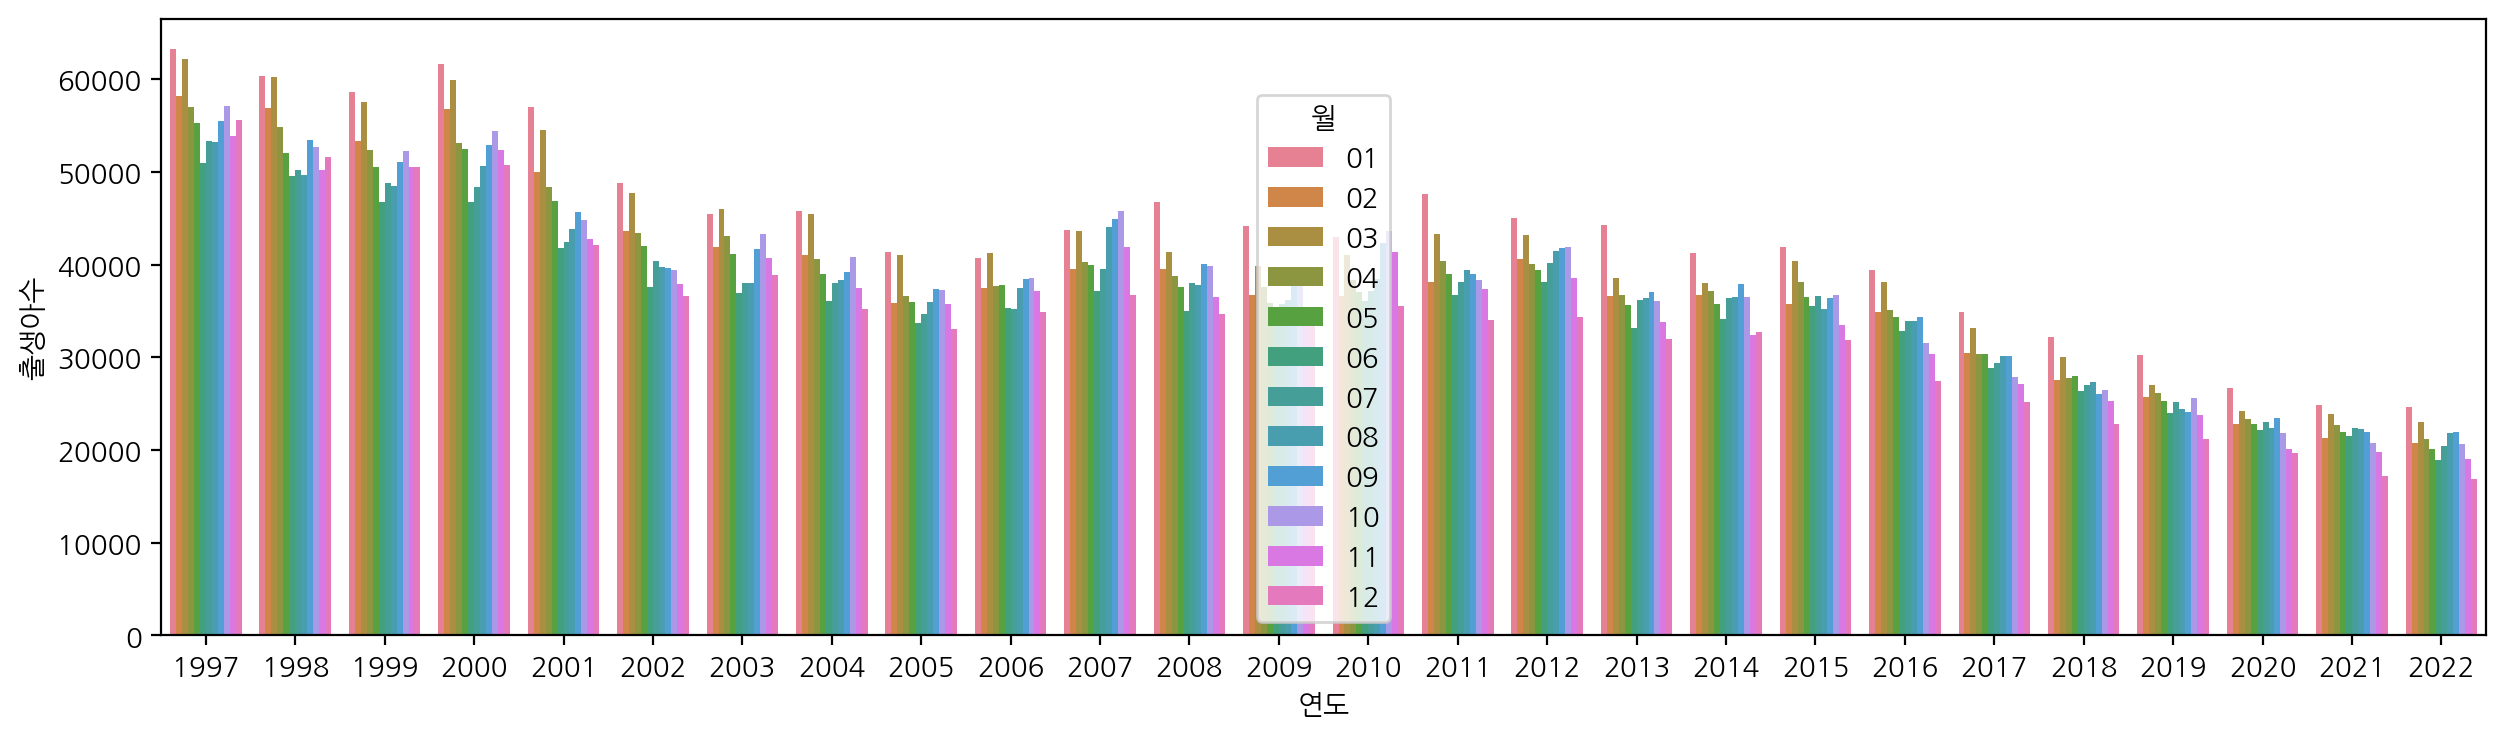

In [30]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_all, x="연도", y="출생아수", errorbar=None, hue="월")

In [31]:
df_local = df[df["시군구별"] != "전국"].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


<Axes: xlabel='연도', ylabel='출생아수'>

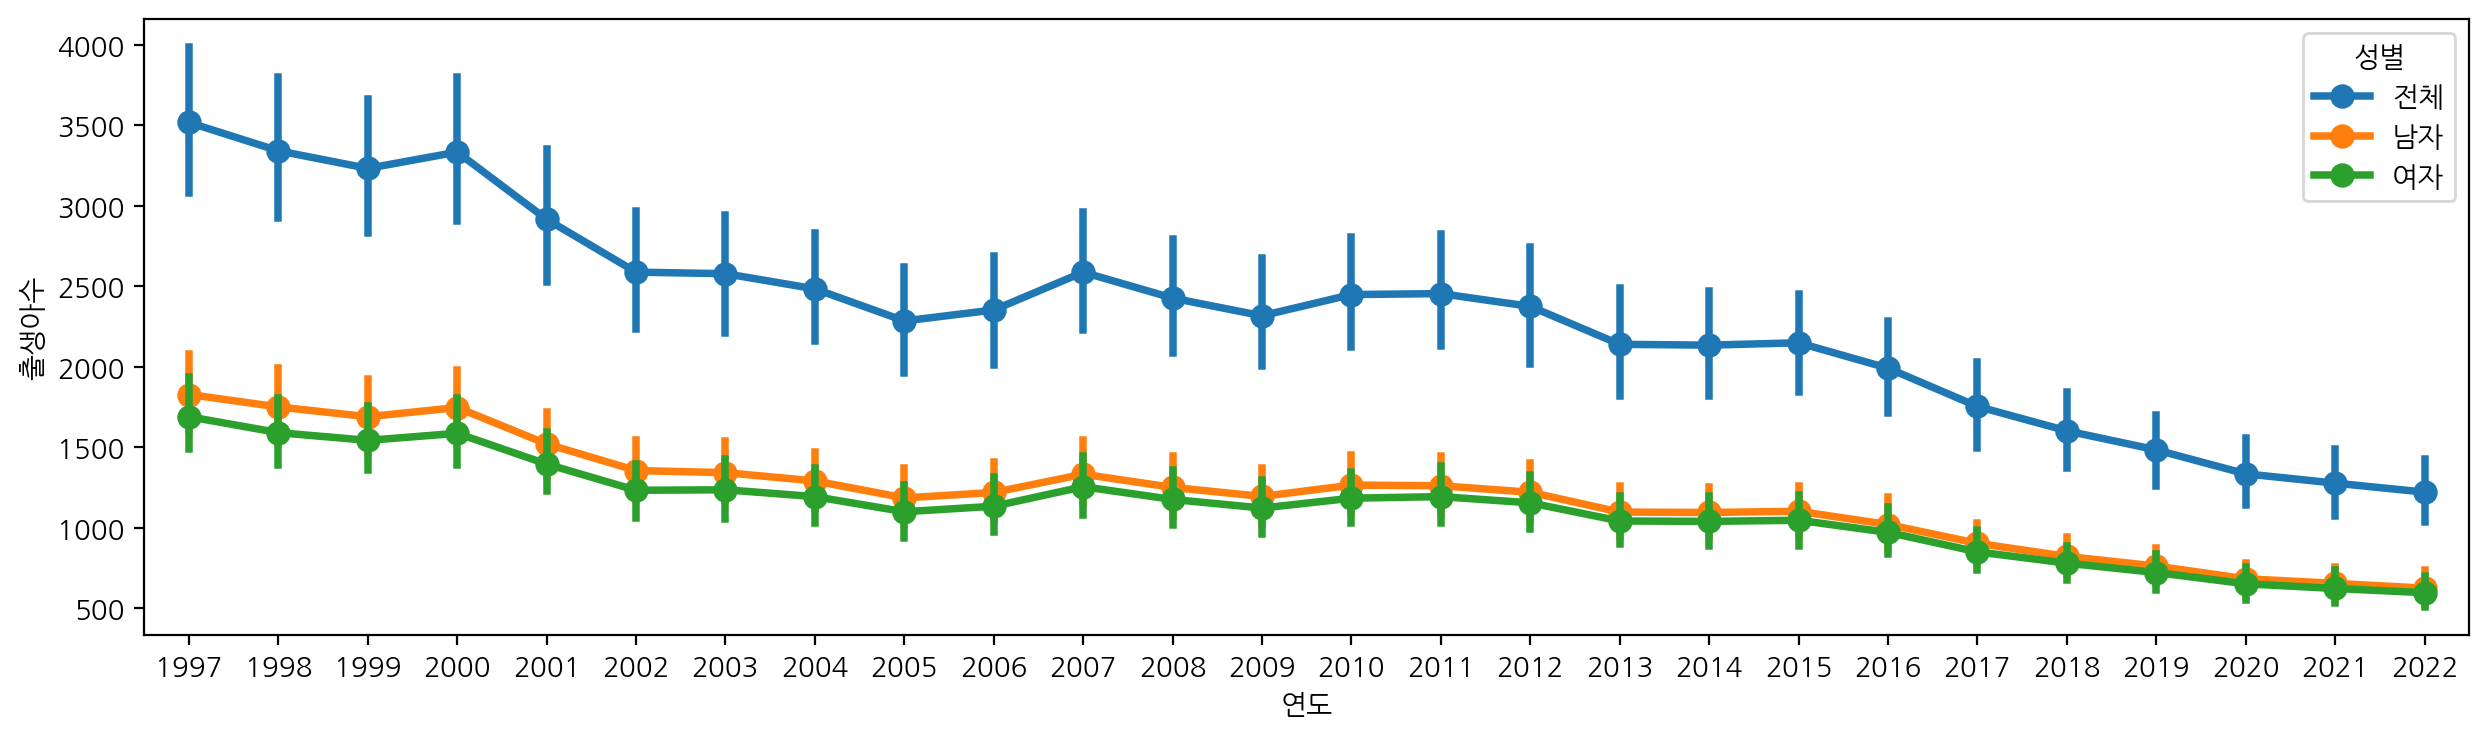

In [32]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local, x="연도", y="출생아수", hue="성별")

In [33]:
df_local_all = df_local[df_local["성별"] == "전체"]
df_local_all.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


<Axes: xlabel='연도', ylabel='출생아수'>

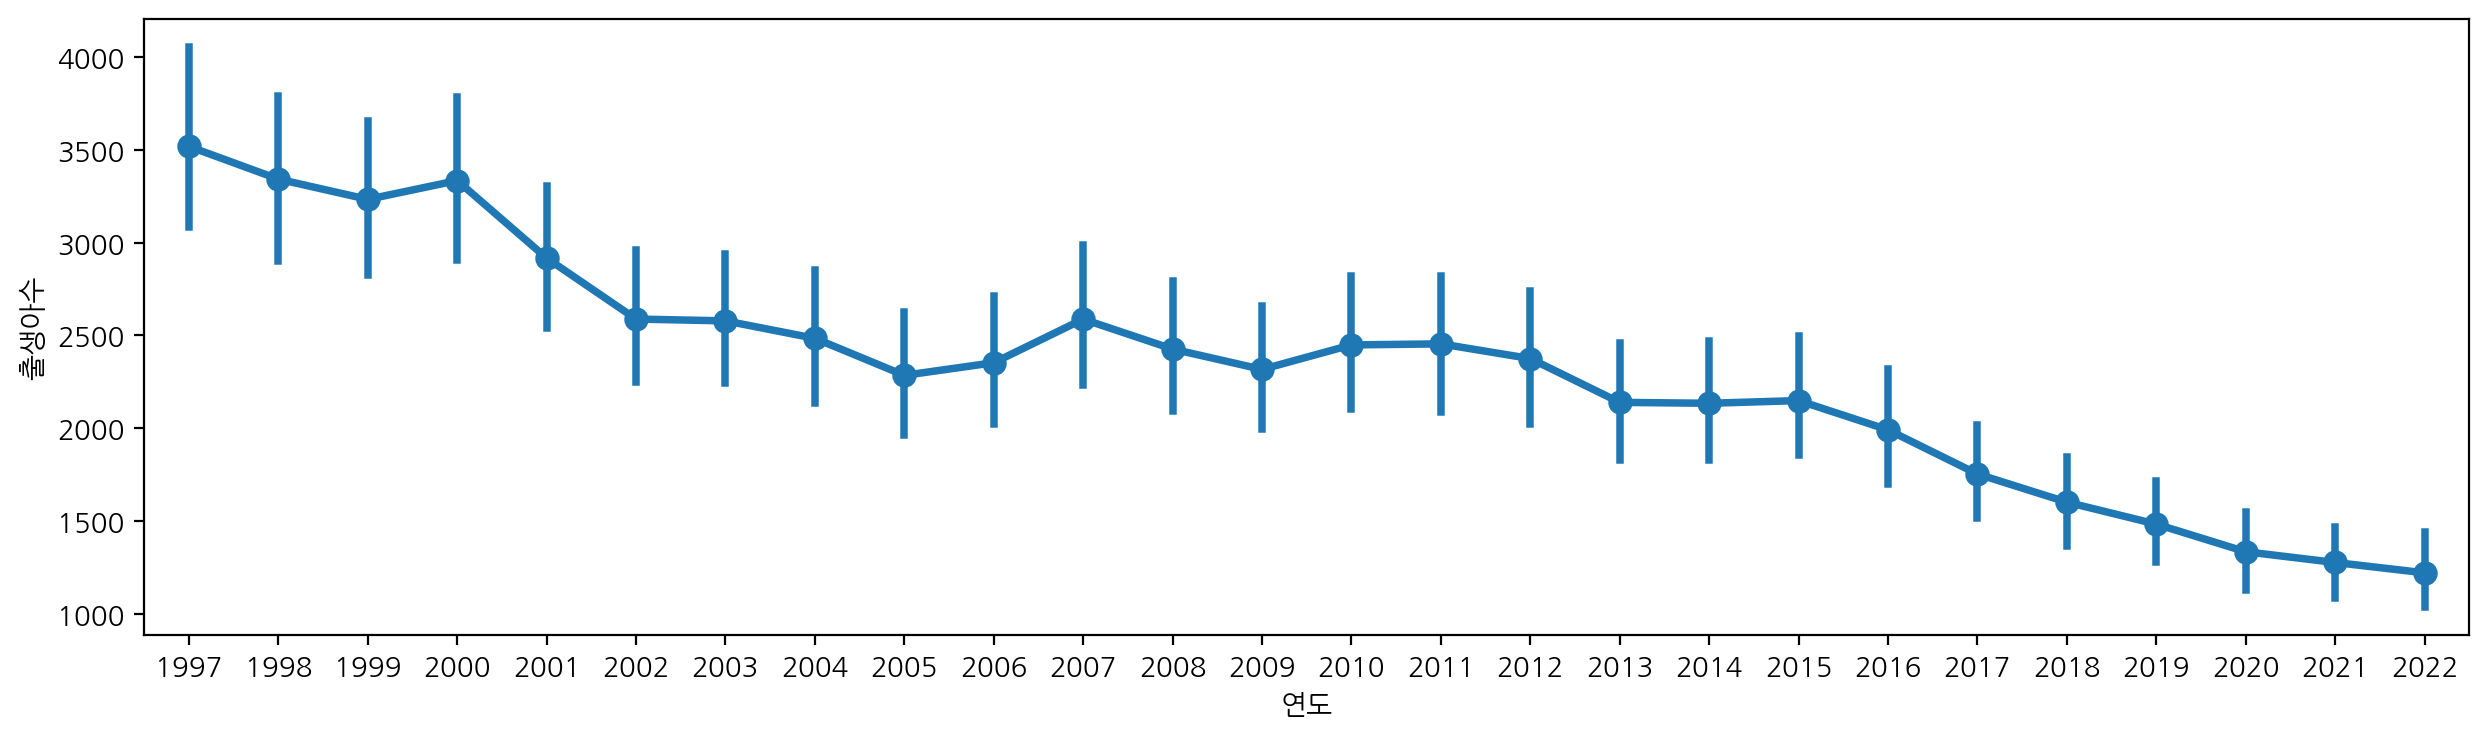

In [34]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local_all, x="연도", y="출생아수")

In [35]:
df_local_all.columns

Index(['시군구별', '기간', '출생아수', '연도', '월', '성별'], dtype='object')

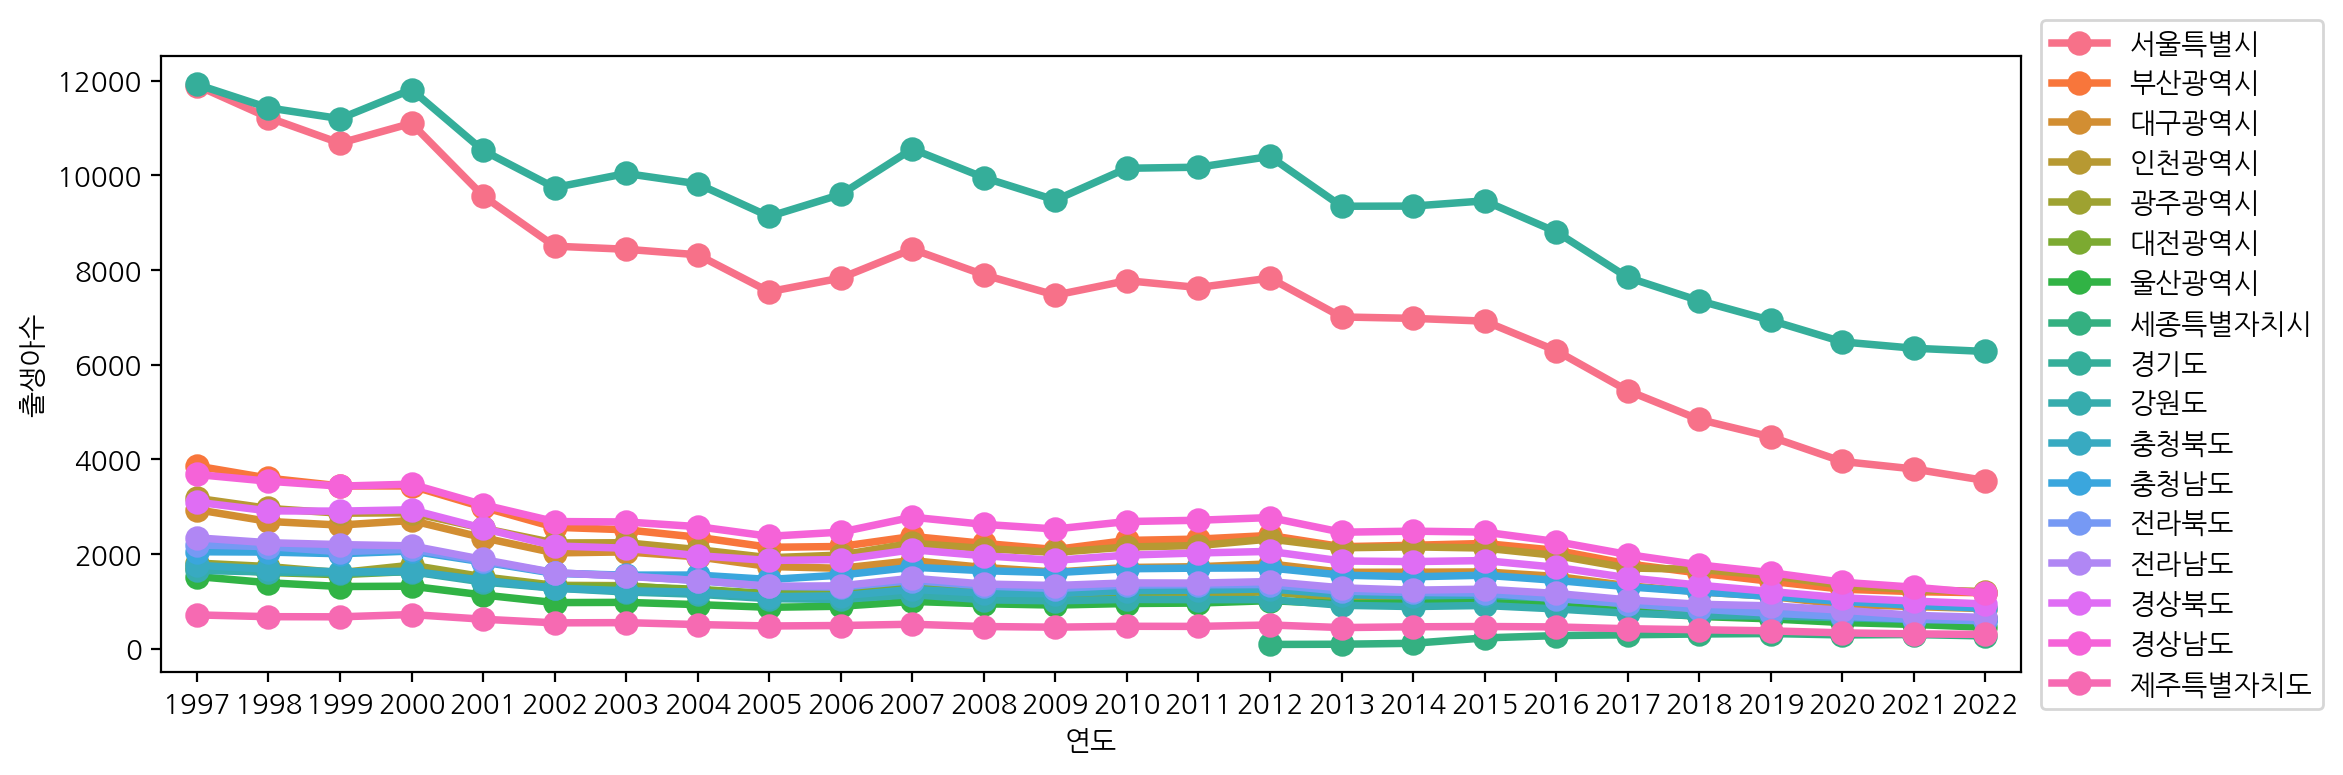

In [36]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df_local_all, x="연도", y="출생아수", hue="시군구별", errorbar=None)
plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

In [37]:
df_local_2 = df_local_all[df_local_all["시군구별"].isin(["서울특별시", "경기도", "세종특별자치시"])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
9,세종특별자치시,1997.01,NaN,1997,01,전체
10,경기도,1997.01,13440.0,1997,01,전체
59,서울특별시,1997.02,12239.0,1997,02,전체
66,세종특별자치시,1997.02,NaN,1997,02,전체


<Axes: xlabel='연도', ylabel='출생아수'>

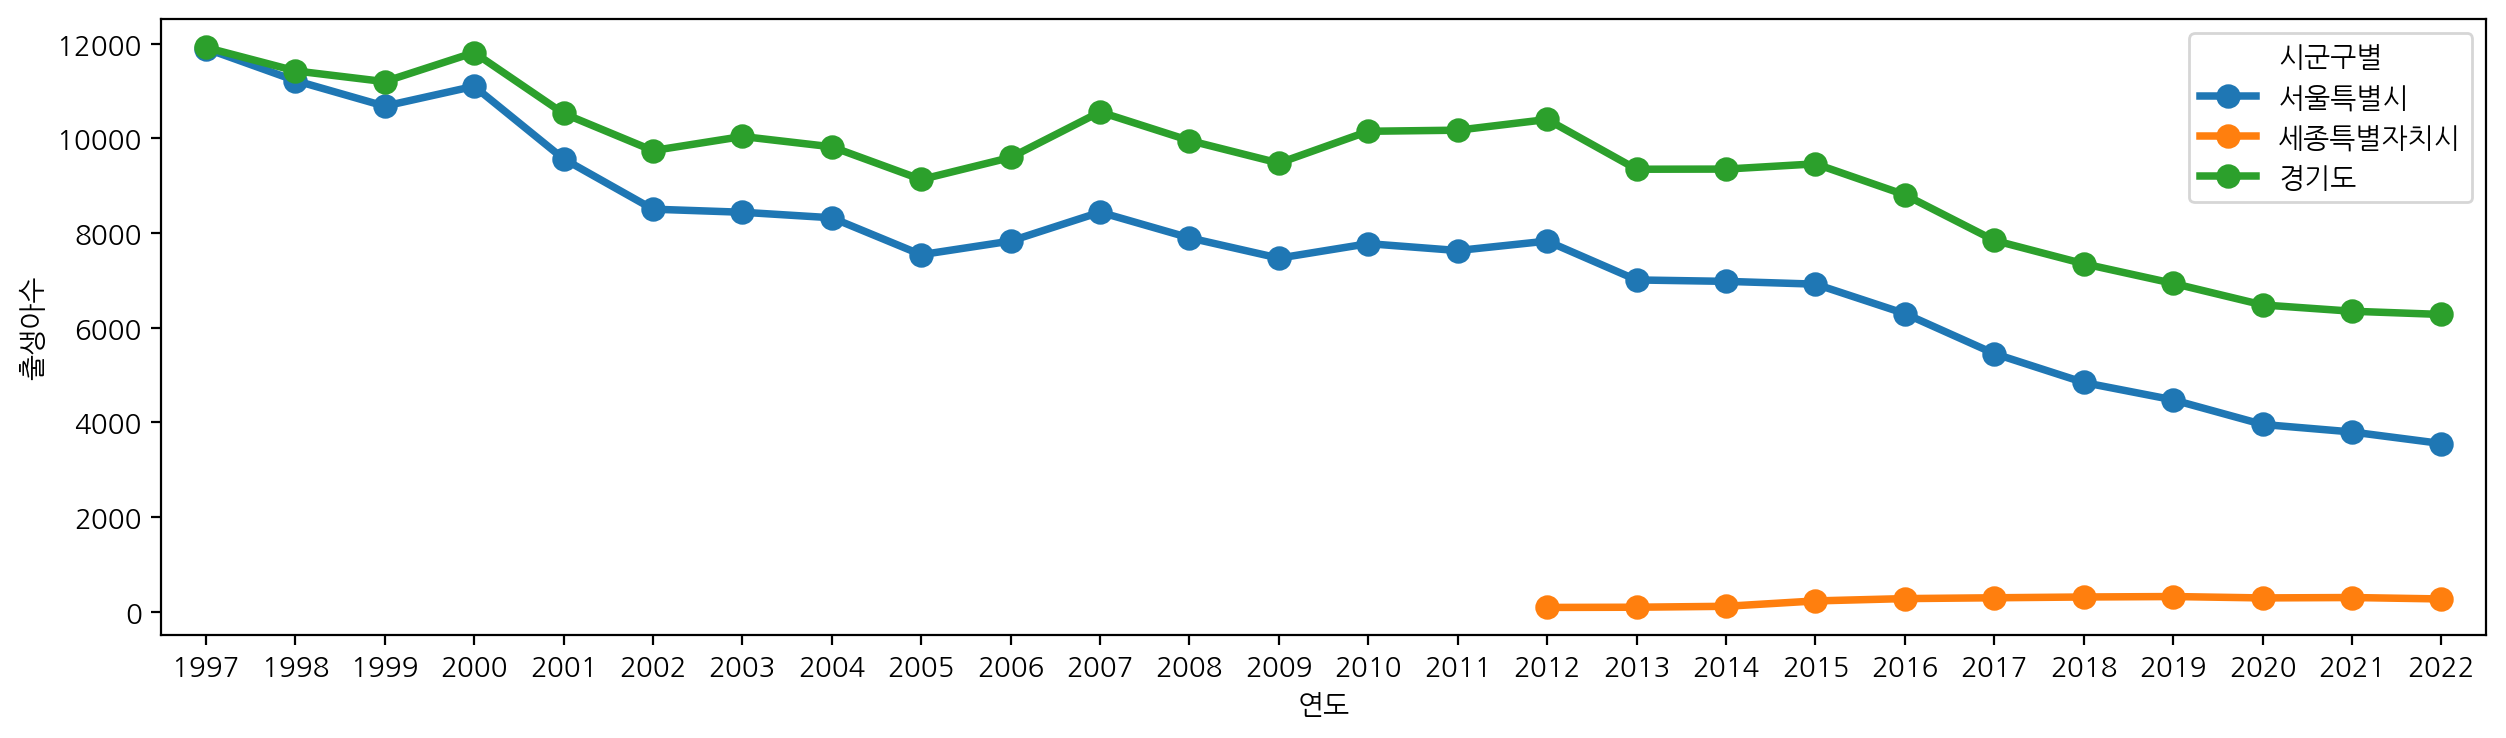

In [38]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local_2, x="연도", y="출생아수", errorbar=None, hue="시군구별")

In [39]:
df_sj = df[df["시군구별"] == "세종특별자치시"].dropna(how="any")
df_sj.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012.01,73.0,2012,01,전체
10288,세종특별자치시,2012.01.1,38.0,2012,01,남자
10307,세종특별자치시,2012.01.2,35.0,2012,01,여자
10326,세종특별자치시,2012.02,74.0,2012,02,전체
10345,세종특별자치시,2012.02.1,43.0,2012,02,남자


<Axes: xlabel='연도', ylabel='출생아수'>

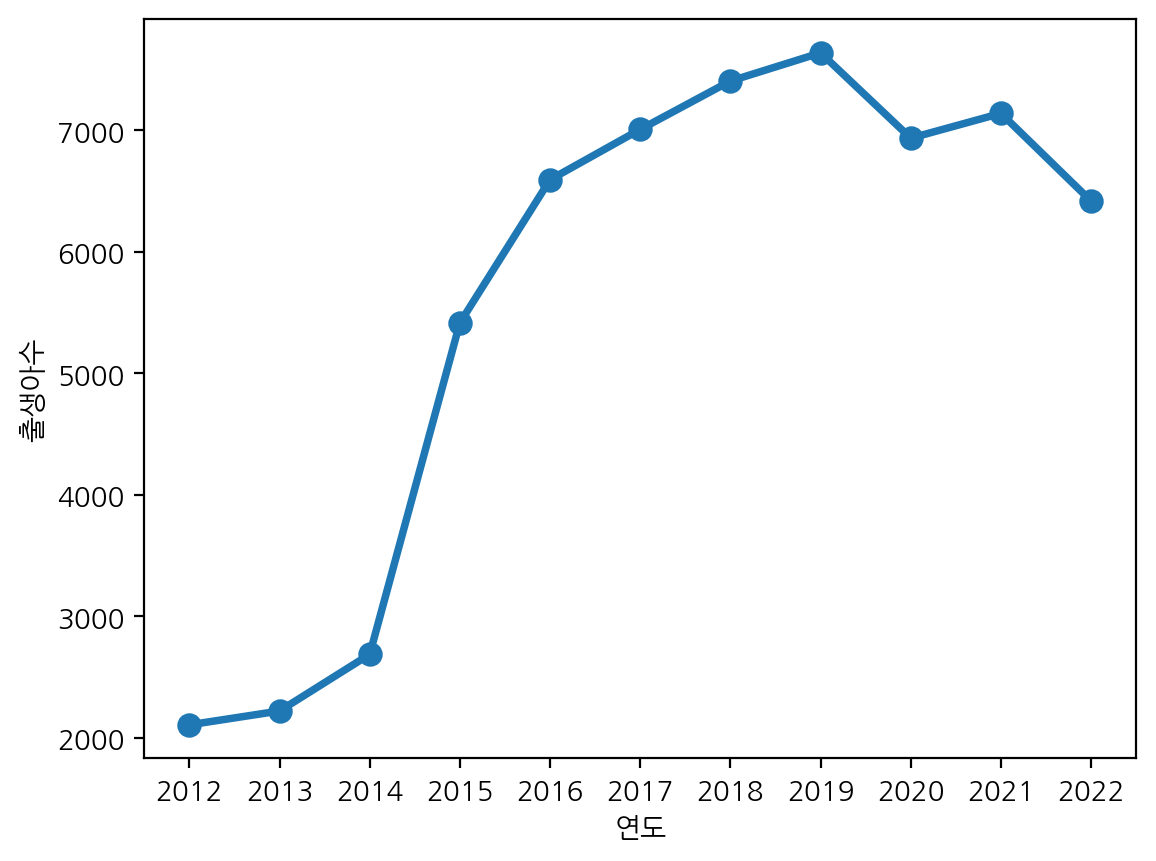

In [40]:
import numpy as np
sns.pointplot(data=df_sj, x="연도", y="출생아수", errorbar=None, estimator=np.sum)

In [41]:
df_local_all

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체
...,...,...,...,...,...,...
17741,전라북도,2022.12,483.0,2022,12,전체
17742,전라남도,2022.12,500.0,2022,12,전체
17743,경상북도,2022.12,770.0,2022,12,전체
17744,경상남도,2022.12,993.0,2022,12,전체


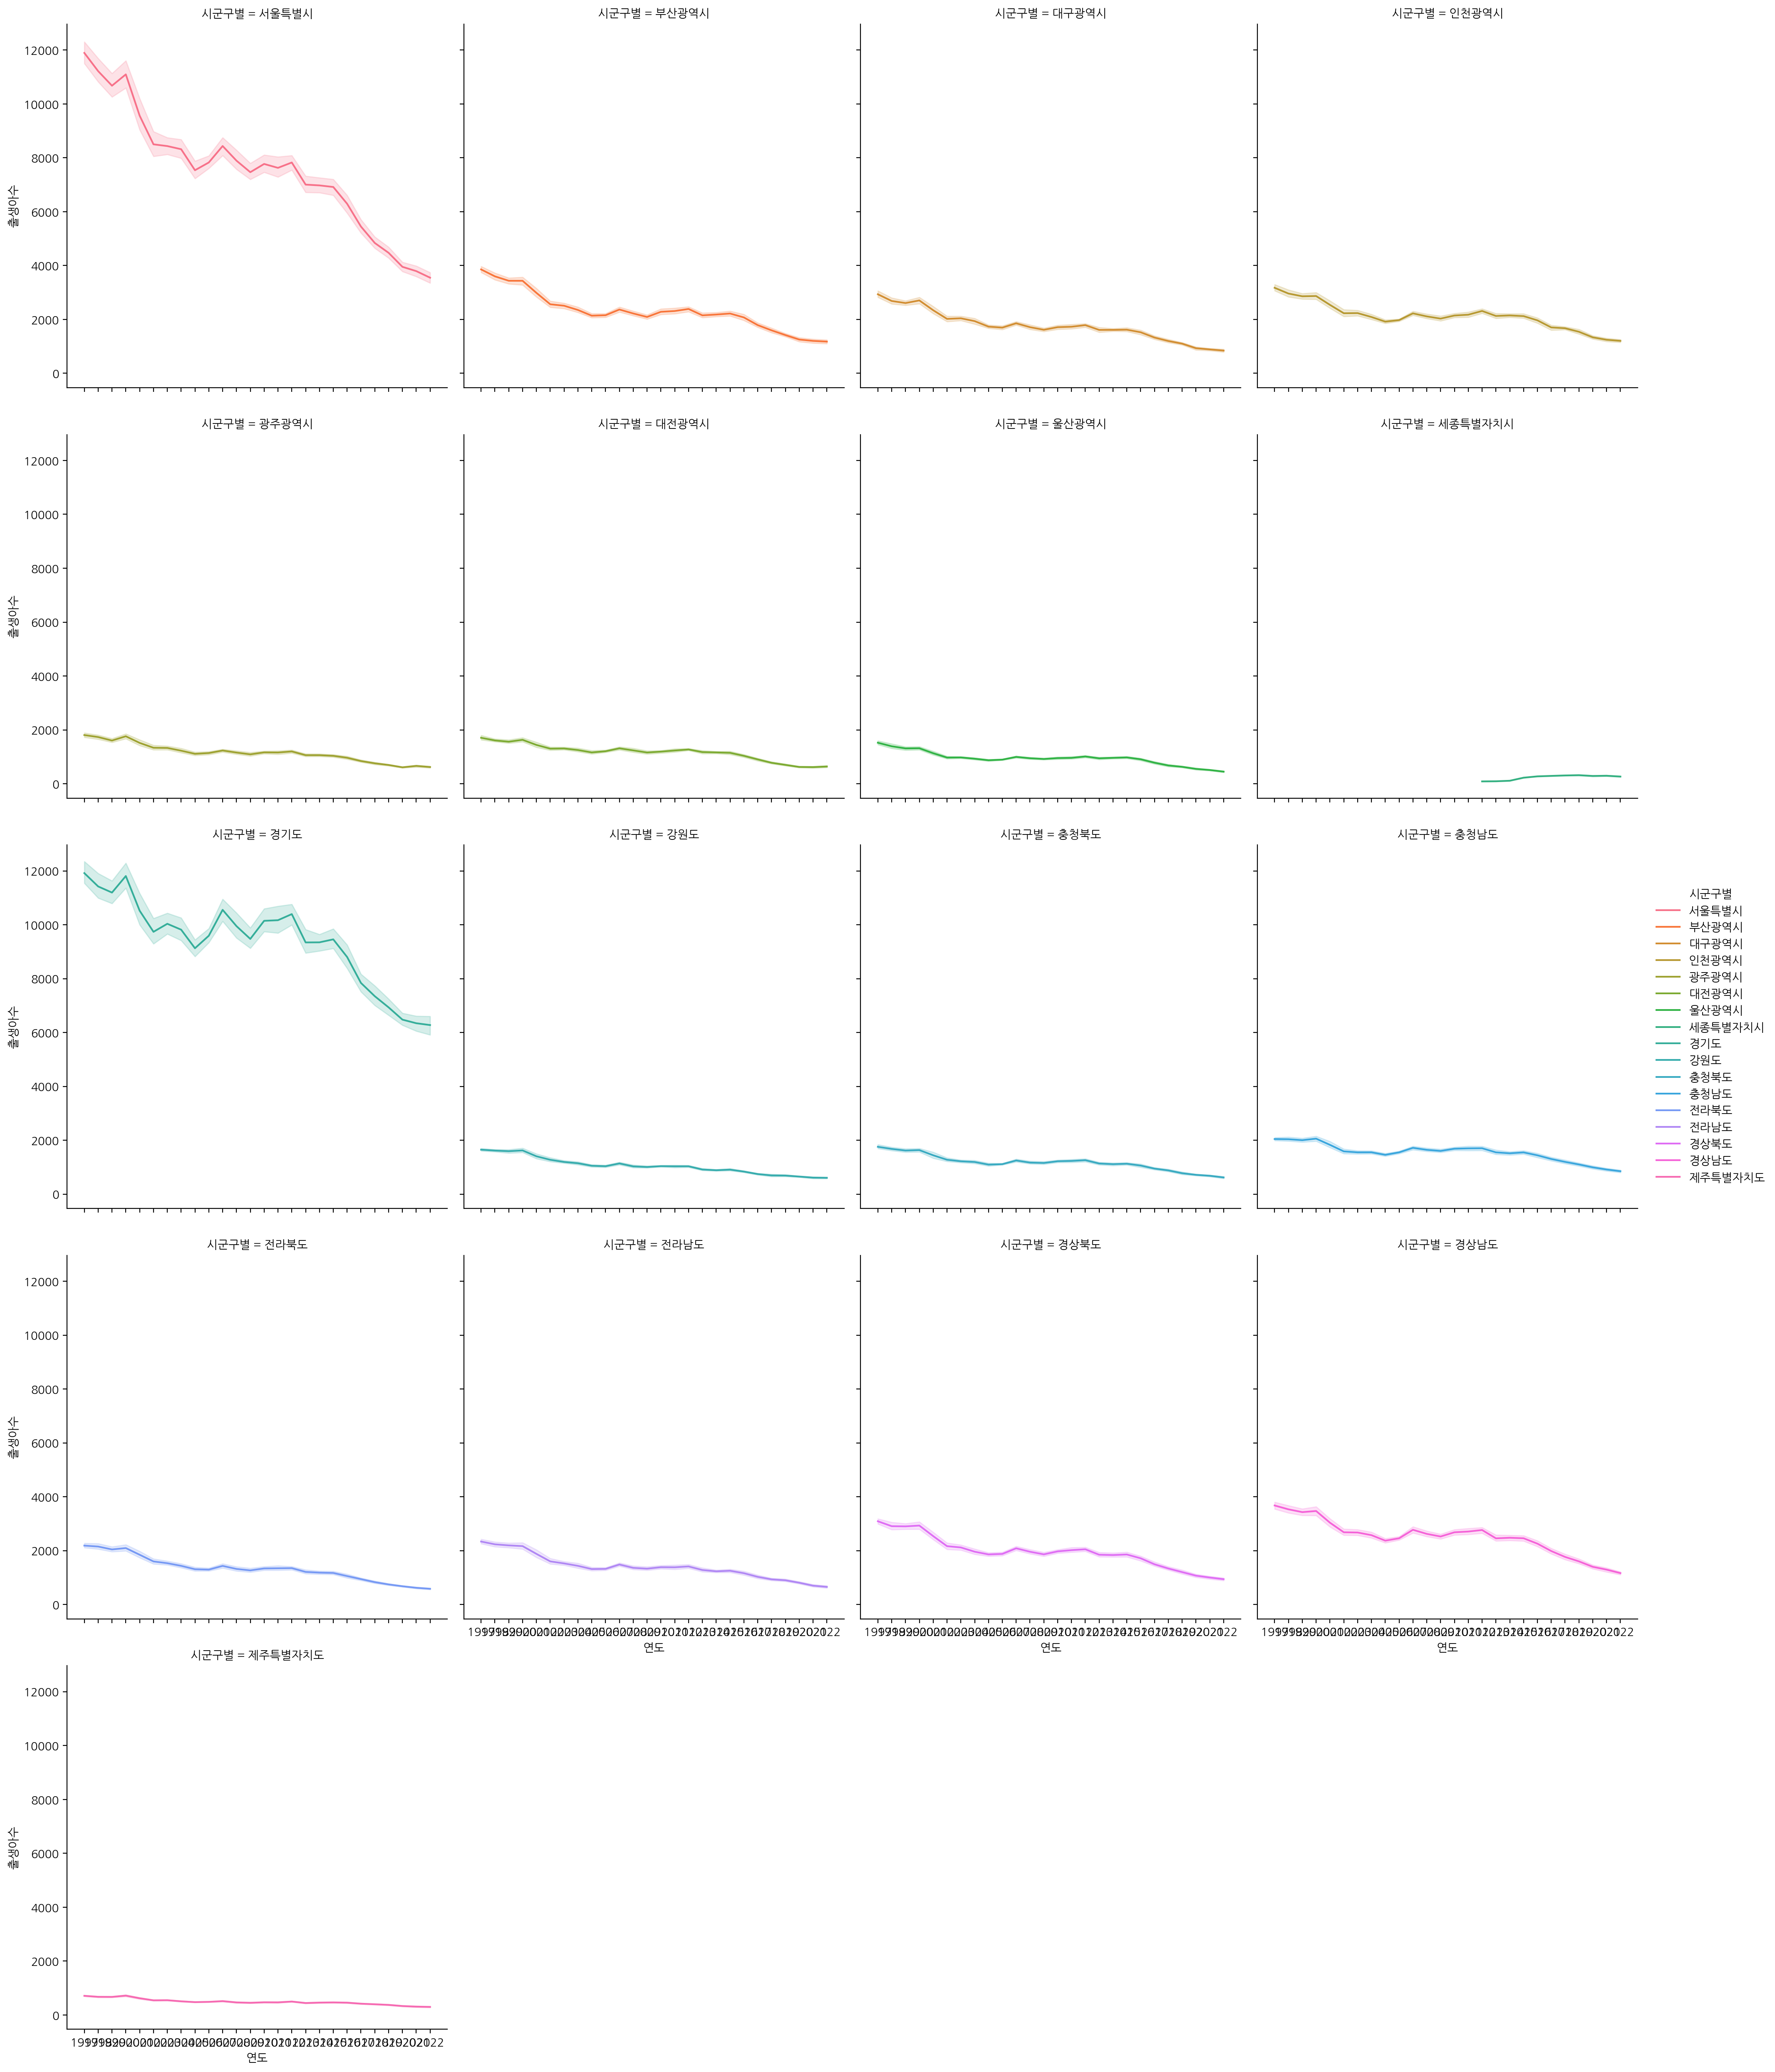

In [42]:
sns.relplot(data=df_local_all.sort_values(by=["연도", "월"]), x="연도", y="출생아수", kind="line", col="시군구별", col_wrap=4, hue="시군구별")

In [43]:
df_local_gender = df[(df["시군구별"] != "전국") & (df["성별"] !=  "전체")]

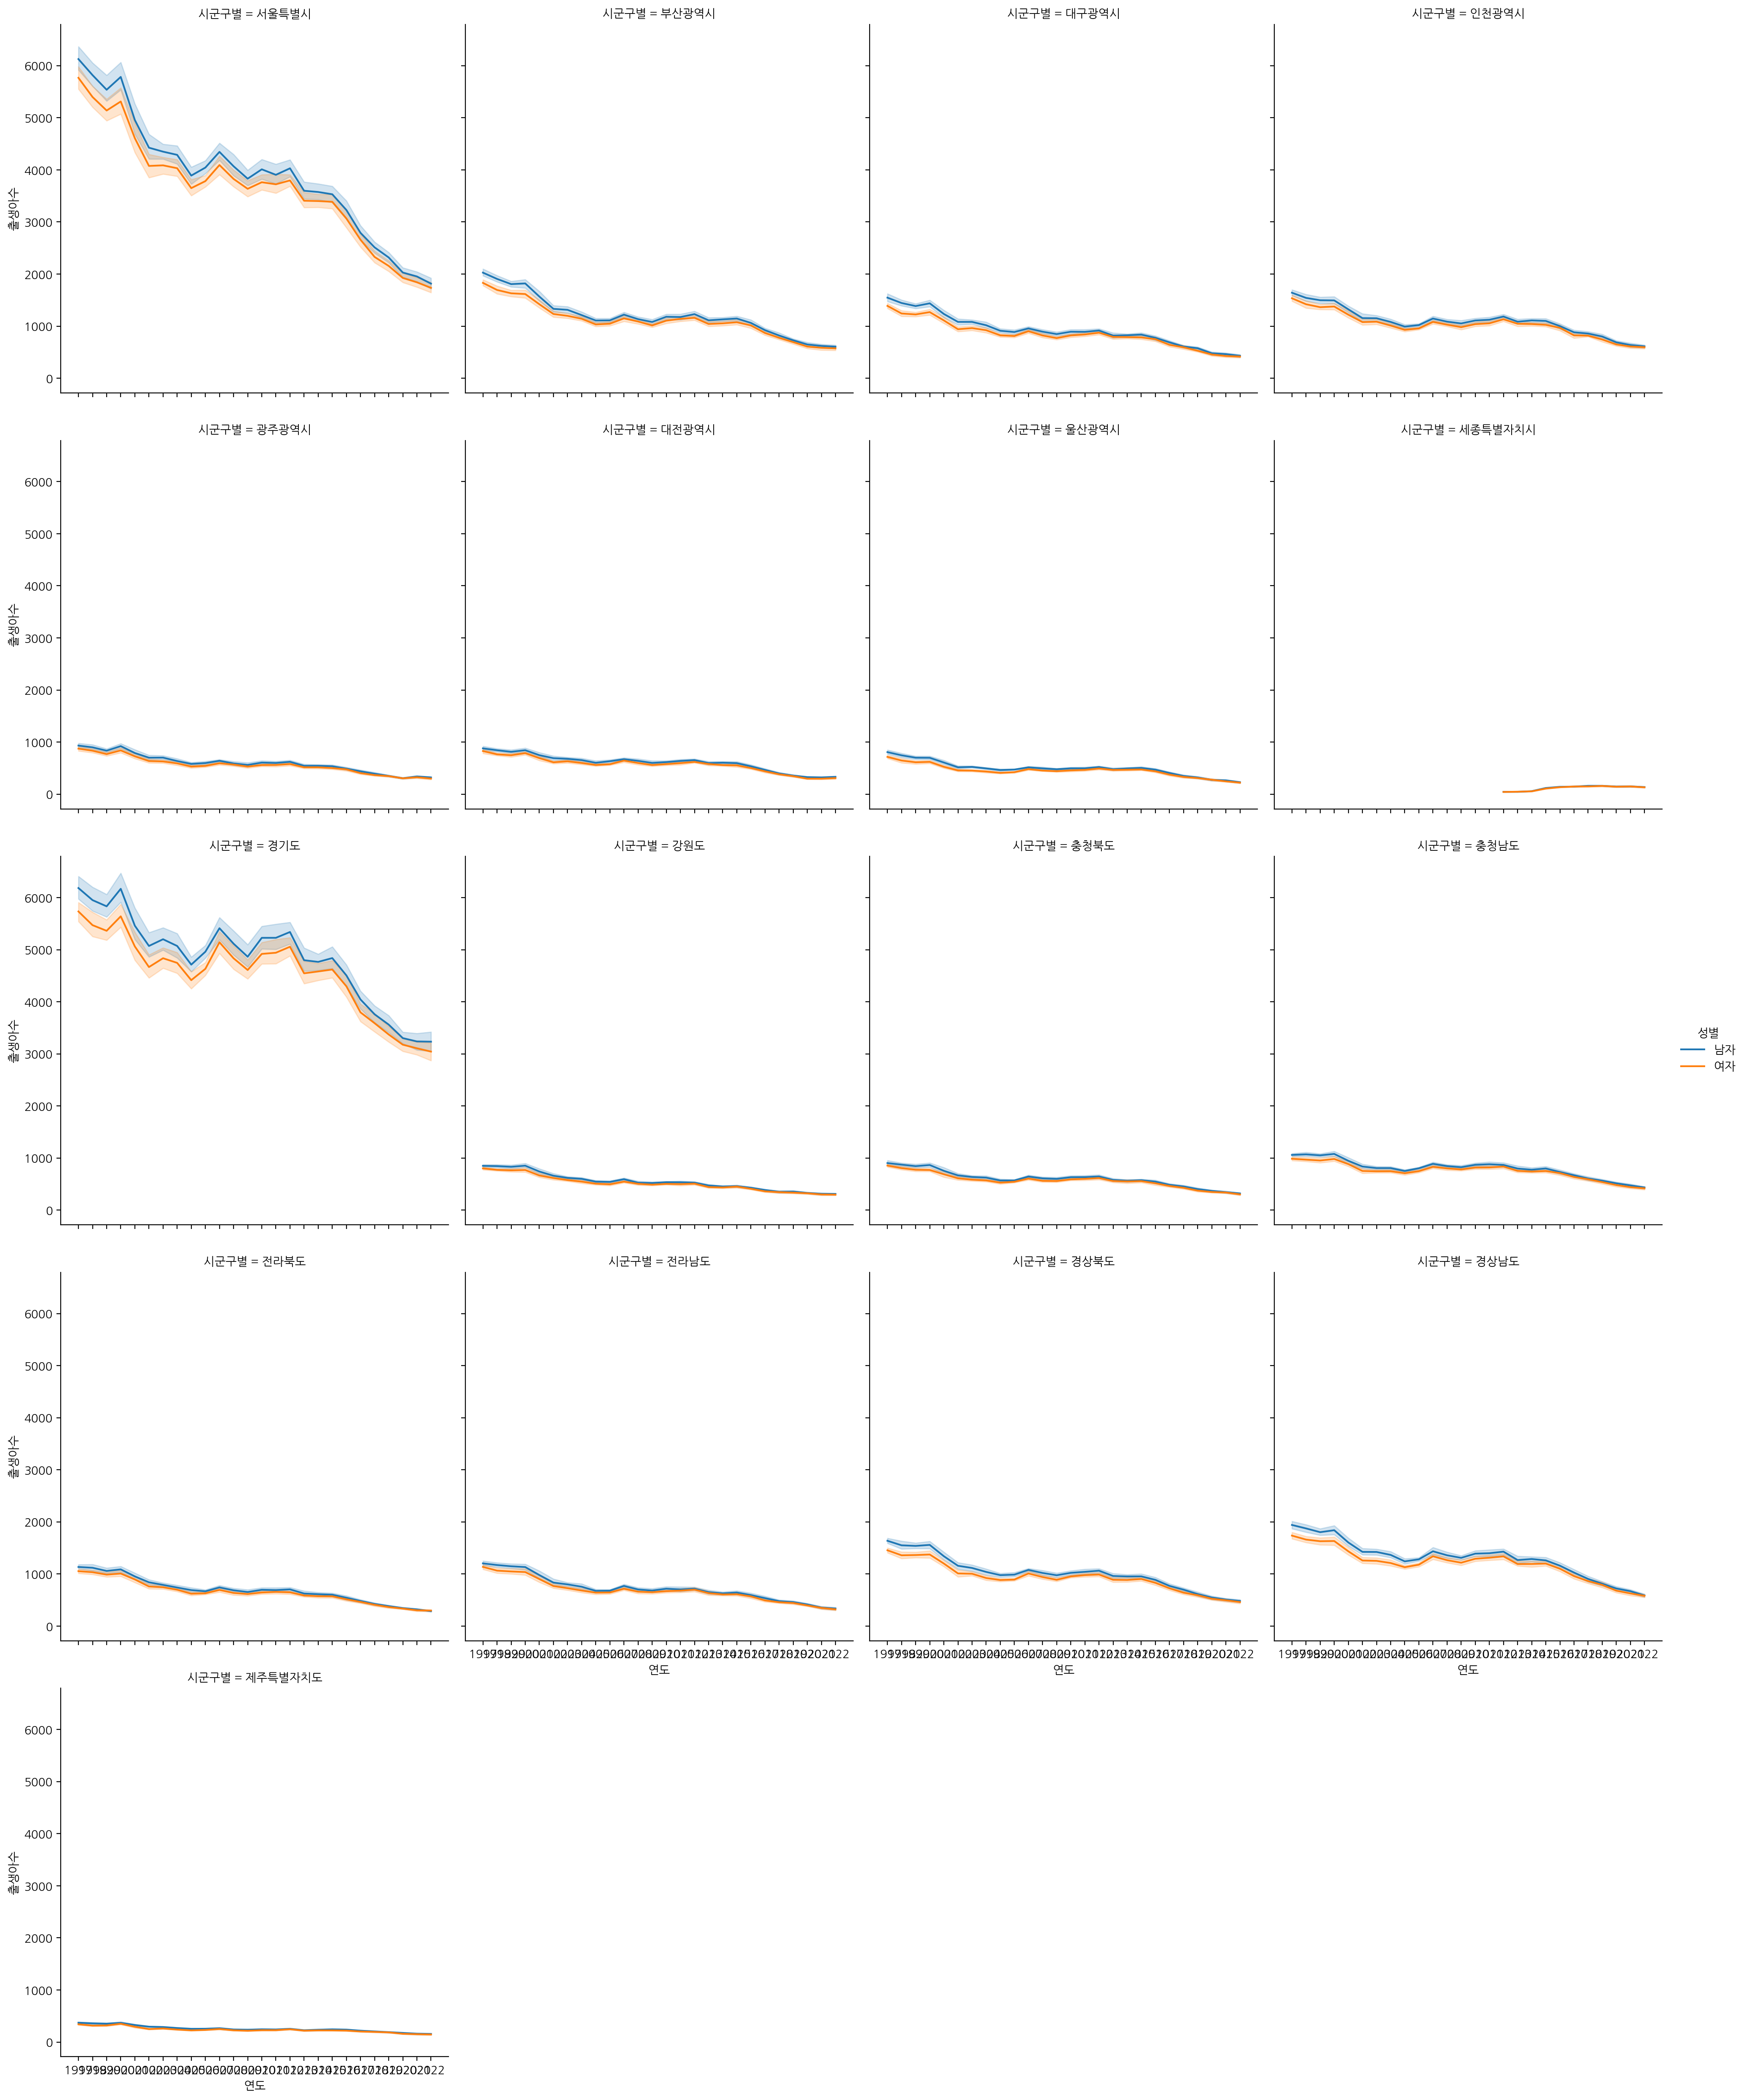

In [44]:
sns.relplot(data=df_local_gender, x="연도", y="출생아수", kind="line", col="시군구별", col_wrap=4, hue="성별")